# Learning Analytics & Educational Data Mining
Student performance is often used to assess quality of education. often, the metrics used to measure and/or predict student performance are the Cumulative Grade Point Average (CGPA) and internal assessments. some researches in the past have expanded the scope of metrics to include other apects about the students such as amount of time spent studying, distane travelled to get to school, family relations, free time they get and internet access. others have on a larger scope studied how students rated the structure and delivery of course content bu instructors as this plays abig role in their perfromance.Thi project attempts to improve educationl systems using the above-mentioned data. the project will make use of data science principles and machine learning models to identify attributes that have the most correlation t0 student perfromance and predict future performance based on these.

## The project seeks to answer the following questions:

    1. What are the factors affecting student achievements?
    2. Isit possible to predict intsructor performance
## Data Sets:
    [The Turkiye Student Evaluatin Data Set]: http://nrvis.com/data/mldata/turkiye-student-evaluation_R_Specific.csv
    [Student Performance Data Set] (https://www.kaggle.com/aljarah/xAPI-Edu-Data/download)

# Citation
``` python
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}
```

# Initial Setup

In [1]:
# Initial setup
# import the necessary libraries

import pandas as pd              # for data manipulation
import matplotlib.pyplot as plt  # for visualizations
import numpy as np               # for statistical calculations
import seaborn as sns            # for stiatical analysis
import sklearn                   # for modelling


# The Turkiye Data Set




## Loading the data set

In [2]:
# Load the Turkiye Student Evaluation Data Set into a Data Frame

# url for downloading the dataset
turkiye_df_url = "http://nrvis.com/data/mldata/turkiye-student-evaluation_R_Specific.csv"
#load the dataset into a dataframe using pandas
turkiye_df= pd.read_csv(turkiye_df_url)
print (turkiye_df.columns)
turkiye_df.tail()

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5816,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5817,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5818,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5820,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# check for missing/null values

turkiye_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 1 to 5820
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [4]:
turkiye_df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


# The student Performance Data Set

 This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful

In [5]:
# loading the data into a data frame 

dataset_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
student_mat_df = pd.read_csv(dataset_url, ";")
student_mat_df.head()
student_mat_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [6]:
student_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
student_mat_df.romantic[~student_mat_df.romantic.isin(['yes', "no"])]


Series([], Name: romantic, dtype: object)

In [8]:
student_mat_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Encoding categorical variables

In [9]:
# encoding the string variables
# some models are unable to deal with string values or do not perform well with them
# Hence the string values require encoding

# Binary values are encoded to a 1 or 0, e.g, Yes/No, Male/Female
student_mat_df["school"] = np.where(student_mat_df["school"].str.contains("GP", "MS"),1, 0)
student_mat_df["sex"] = np.where(student_mat_df["sex"].str.contains("M", "F"), 1, 0)
student_mat_df["address"] = np.where(student_mat_df["address"].str.contains("U", "R"), 1, 0)
student_mat_df["famsize"] = np.where(student_mat_df["famsize"].str.contains("LE3", "GT"), 1, 0)
student_mat_df["Pstatus"] = np.where(student_mat_df["Pstatus"].str.contains("T", "A"), 1, 0)
student_mat_df["schoolsup"] = np.where(student_mat_df["schoolsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["famsup"] = np.where(student_mat_df["famsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["paid"] = np.where(student_mat_df["paid"].str.contains("yes", "no"), 1, 0)
student_mat_df["activities"] = np.where(student_mat_df["activities"].str.contains("yes", "no"), 1, 0)
student_mat_df["nursery"] = np.where(student_mat_df["nursery"].str.contains("yes", "no"), 1, 0)
student_mat_df["higher"] = np.where(student_mat_df["higher"].str.contains("yes", "no"), 1, 0)
student_mat_df["internet"] = np.where(student_mat_df["internet"].str.contains("yes", "no"), 1, 0)
student_mat_df["romantic"] = np.where(student_mat_df["romantic"].str.contains("yes", "no"), 1, 0)



In [10]:
# checking for inconsistent entries before encoding
student_mat_df.reason[~student_mat_df.reason.isin(["home", "reputation", "course", "other"])]
student_mat_df.guardian[~student_mat_df.guardian.isin(["mother", "father", "other"])]
student_mat_df.Mjob[~student_mat_df.Mjob.isin(["teacher", "health", "services", "at_home", "other"])]
student_mat_df.Fjob[~student_mat_df.Fjob.isin(["teacher", "health", "services", "at_home", "other"])]


Series([], Name: Fjob, dtype: object)

In [11]:
# Here, dictionary comprehension has been used to replace the string values 
# as a form of encoding the categorical data

labels = student_mat_df['Mjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Mjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['Fjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Fjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['guardian'].astype('category').cat.categories.tolist()
replace_map_comp = {'guardian' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['reason'].astype('category').cat.categories.tolist()
replace_map_comp = {'reason' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

# preview the encoded data
student_mat_df[['Mjob', 'Fjob', 'reason', 'guardian']]

,Mjob,Fjob,reason,guardian
0,1,5,1,2
1,1,3,1,1
2,1,3,3,2
3,2,4,2,2
4,3,3,2,1
...,...,...,...,...
390,4,4,1,3
391,4,4,1,2
392,3,3,1,3
393,4,3,1,2


In [12]:
student_mat_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Data Visualization

In [13]:
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

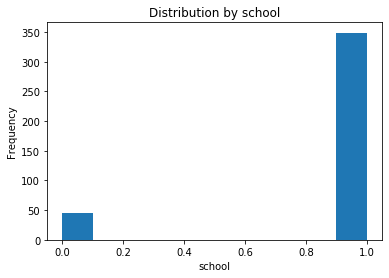

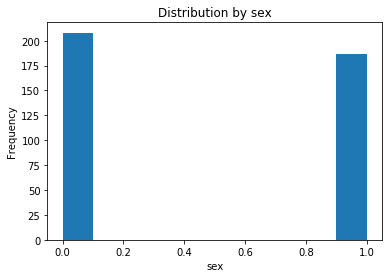

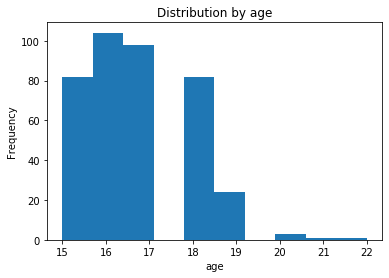

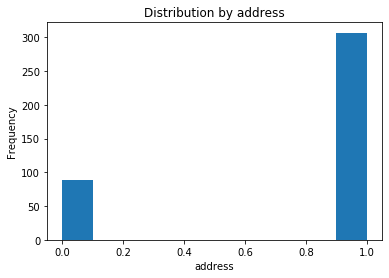

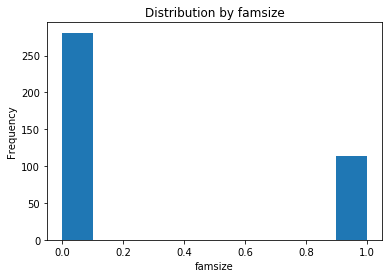

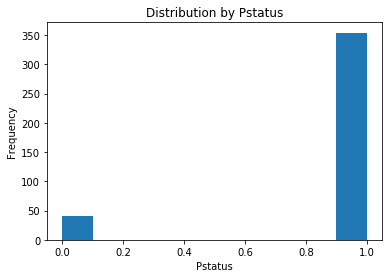

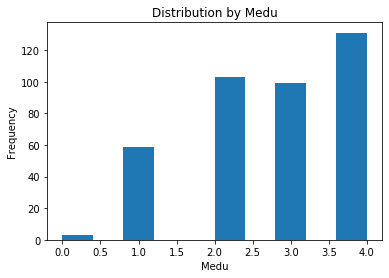

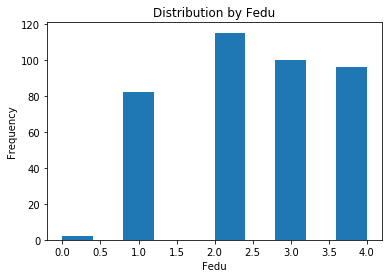

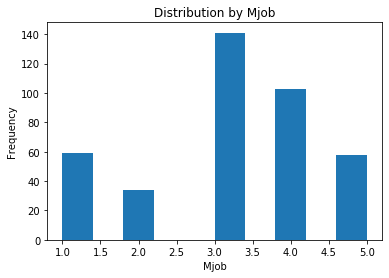

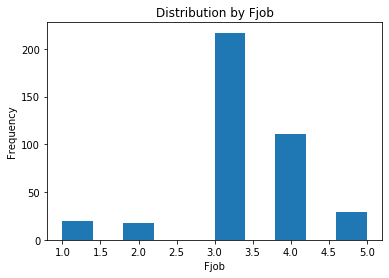

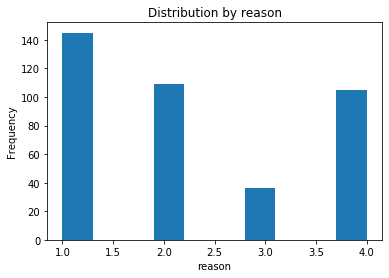

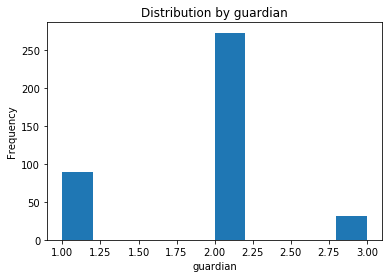

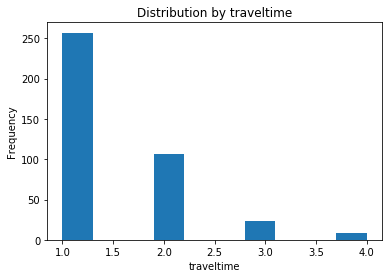

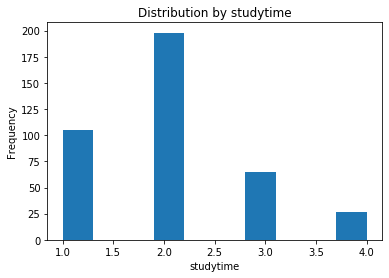

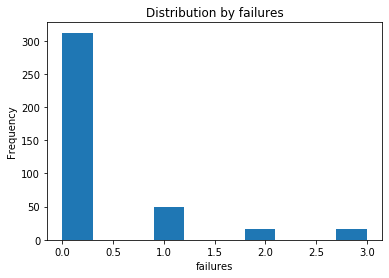

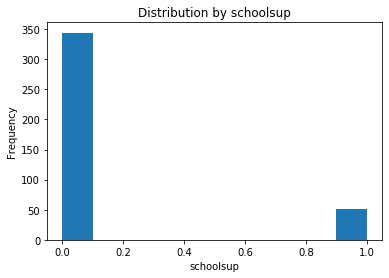

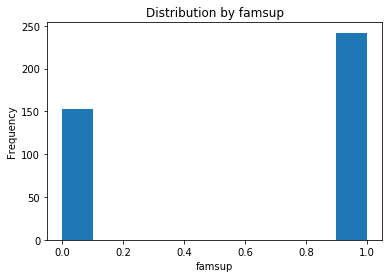

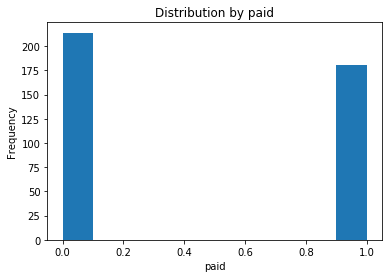

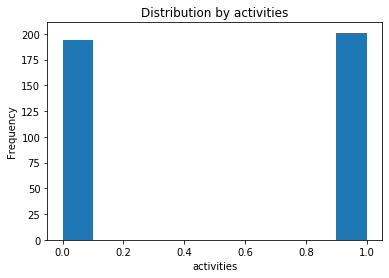

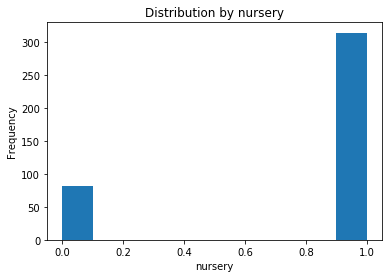

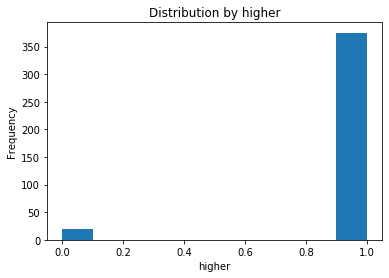

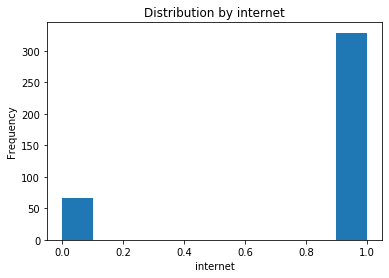

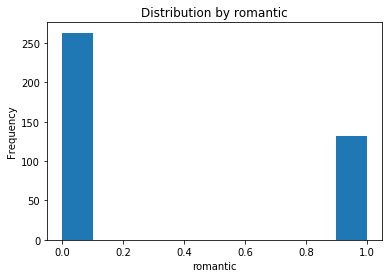

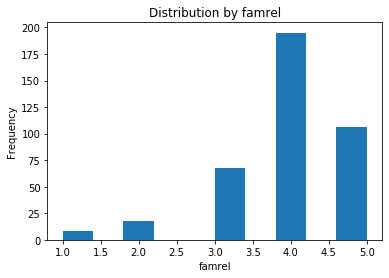

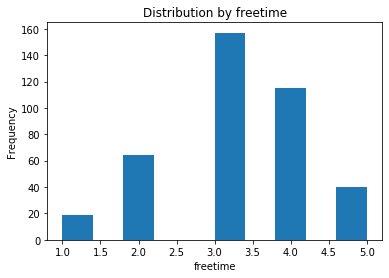

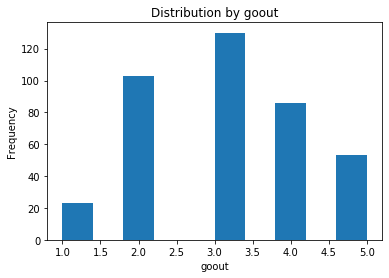

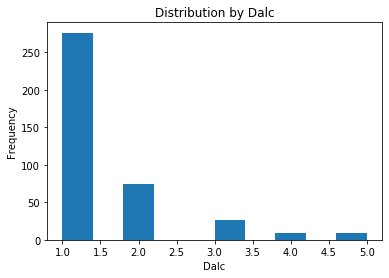

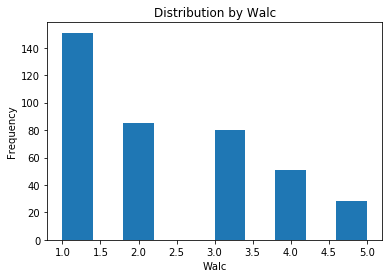

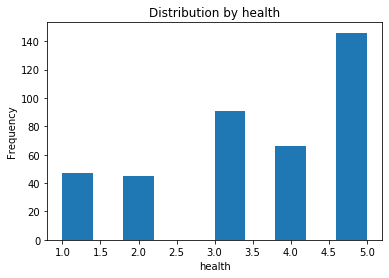

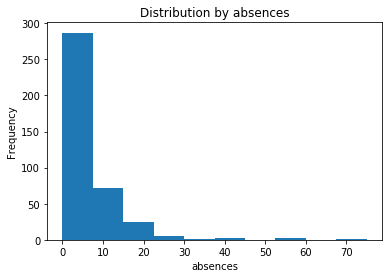

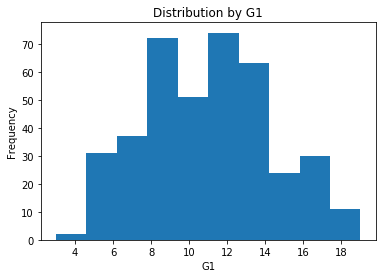

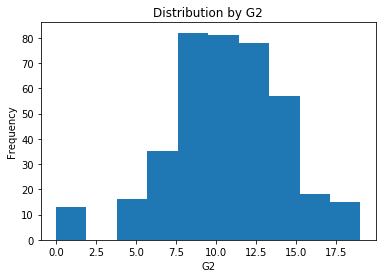

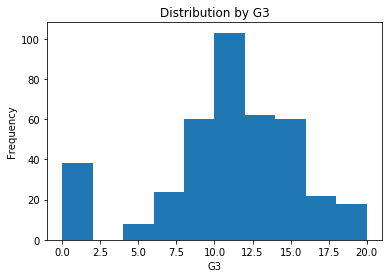

In [14]:
# using histogram plots to check for distribution of data
# the plots can be used to check approximate the shape of the distribution, e.g. normal

for value in range(33):
    #ax = plt.subplot()
    plt.hist(student_mat_df[columns[value]])
    plt.title('Distribution by '+ columns[value])
    plt.xlabel(columns[value])
    plt.ylabel("Frequency")
    plt.show()


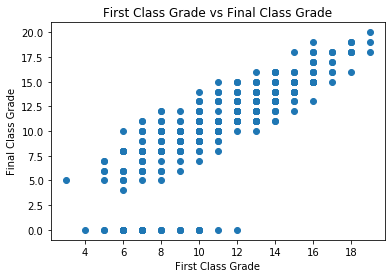

In [15]:
plt.scatter(student_mat_df.G1, student_mat_df.G3)
plt.title("First Class Grade vs Final Class Grade")
plt.xlabel ('First Class Grade')
plt.ylabel ('Final Class Grade')
plt.show()

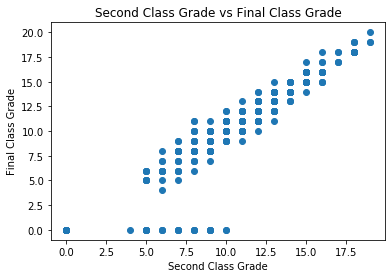

In [16]:
plt.scatter(student_mat_df.G2, student_mat_df.G3)
plt.title("Second Class Grade vs Final Class Grade")
plt.xlabel ("Second Class Grade")
plt.ylabel ('Final Class Grade')
plt.show()

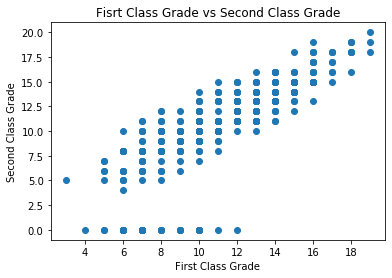

In [17]:
plt.scatter(student_mat_df.G1, student_mat_df.G3)
plt.title('Fisrt Class Grade vs Second Class Grade')
plt.xlabel("First Class Grade")
plt.ylabel("Second Class Grade")
plt.show()

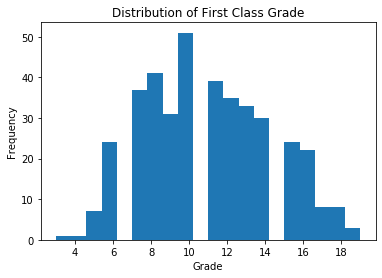

In [18]:
# Distribution of First Class Grade

plt.hist(student_mat_df.G1, bins=20)
plt.title('Distribution of First Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

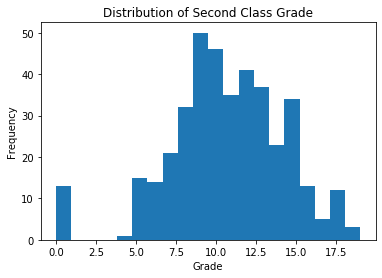

In [19]:
# Distribution of Second Class Grade

plt.hist(student_mat_df.G2, bins=20)
plt.title('Distribution of Second Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

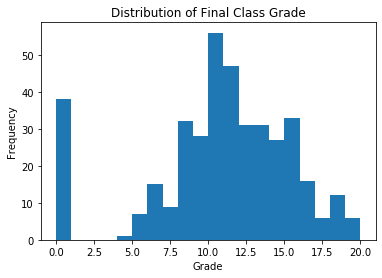

In [20]:
plt.hist(student_mat_df.G3, bins=20)
plt.title('Distribution of Final Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

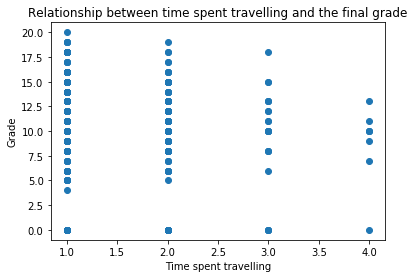

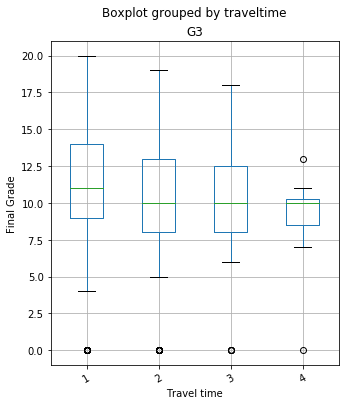

In [72]:
# Relationship between time spent travelling and the final grade

plt.scatter(student_mat_df.traveltime, student_mat_df.G3)
#ax = plt.subplot(211)
plt.title("Relationship between time spent travelling and the final grade")
plt.xlabel("Time spent travelling")
plt.ylabel("Grade")
plt.show()

student_mat_df.boxplot('G3','traveltime',rot = 30,figsize=(5,6))
#ax = plt.subplot(222)
#plt.xticks(np.arange(3), ('', 'Female', 'Male'))
plt.xlabel("Travel time")
plt.ylabel('Final Grade')

plt.show()

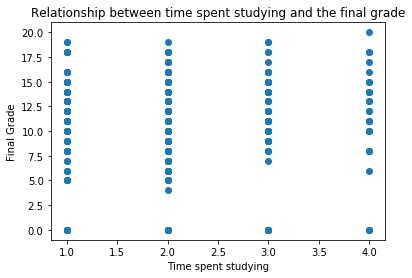

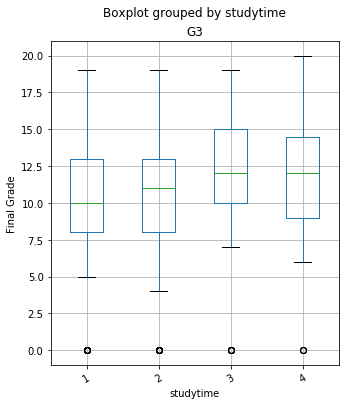

In [73]:
plt.scatter(student_mat_df.studytime, student_mat_df.G3)
plt.title("Relationship between time spent studying and the final grade")
plt.xlabel("Time spent studying")
plt.ylabel("Final Grade")
plt.show()

student_mat_df.boxplot('G3','studytime',rot = 30,figsize=(5,6))
#plt.xticks(np.arange(3), ())
plt.xlabel("studytime")
plt.ylabel('Final Grade')

plt.show()

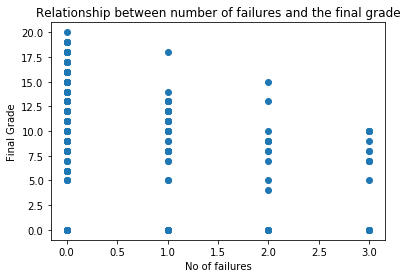

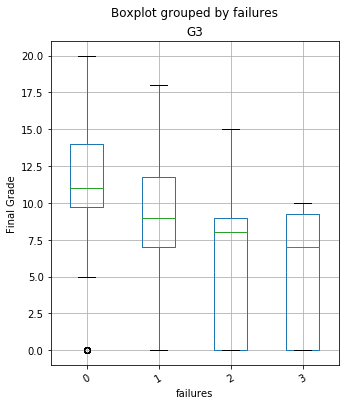

In [74]:
plt.scatter(student_mat_df.failures, student_mat_df.G3)
plt.title("Relationship between number of failures and the final grade")
plt.xlabel("No of failures")
plt.ylabel("Final Grade") 
plt.show()

student_mat_df.boxplot('G3','failures',rot = 30,figsize=(5,6))
#plt.xticks(np.arange(3), ())
plt.xlabel("failures")
plt.ylabel('Final Grade')

plt.show()

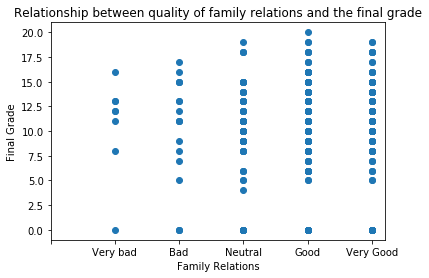

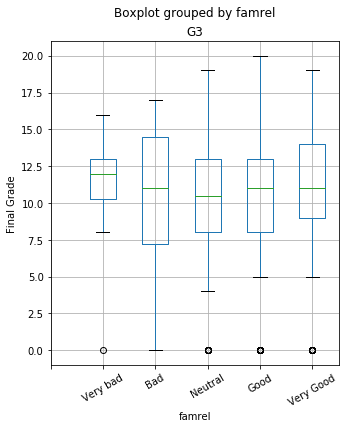

In [76]:
plt.scatter(student_mat_df.famrel, student_mat_df.G3)
plt.title("Relationship between quality of family relations and the final grade")
plt.xlabel("Family Relations")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))

plt.show()

student_mat_df.boxplot('G3','famrel',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("famrel")
plt.ylabel('Final Grade')

plt.show()

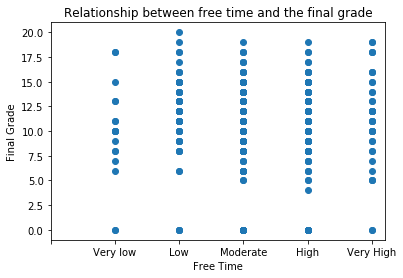

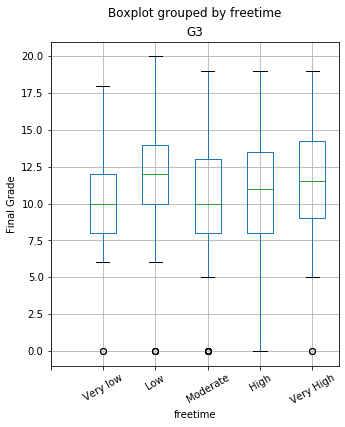

In [77]:
plt.scatter(student_mat_df.freetime, student_mat_df.G3)
plt.title("Relationship between free time and the final grade")
plt.xlabel("Free Time")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))

plt.show()

student_mat_df.boxplot('G3','freetime',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("freetime")
plt.ylabel('Final Grade')

plt.show()

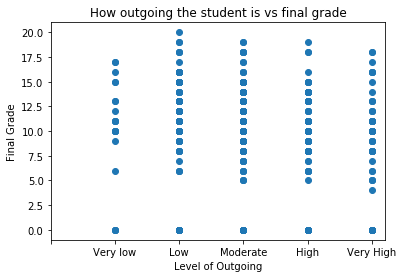

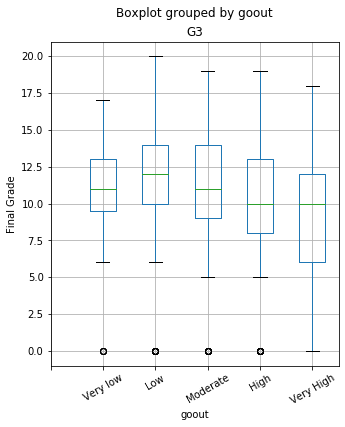

In [78]:
plt.scatter(student_mat_df.goout, student_mat_df.G3)
plt.title("How outgoing the student is vs final grade")
plt.xlabel("Level of Outgoing")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

student_mat_df.boxplot('G3','goout',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("goout")
plt.ylabel('Final Grade')

plt.show()

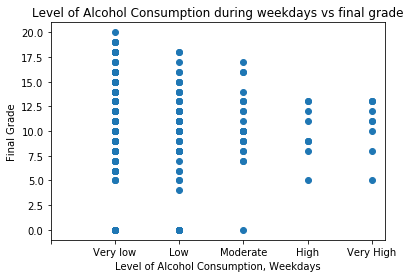

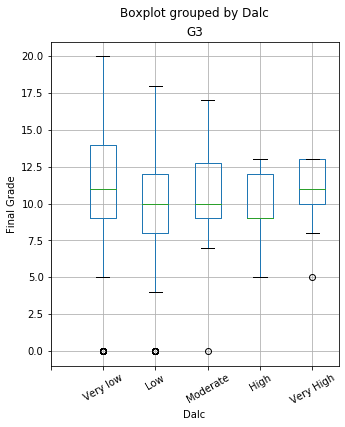

In [79]:
plt.scatter(student_mat_df.Dalc, student_mat_df.G3)
plt.title("Level of Alcohol Consumption during weekdays vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekdays")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

student_mat_df.boxplot('G3','Dalc',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Dalc")
plt.ylabel('Final Grade')
plt.show()

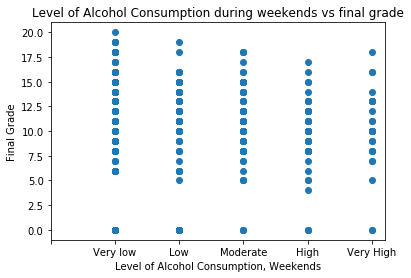

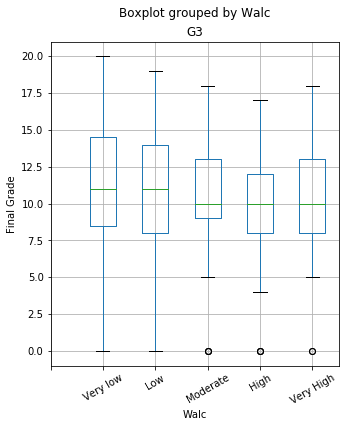

In [80]:
plt.scatter(student_mat_df.Walc, student_mat_df.G3)
plt.title("Level of Alcohol Consumption during weekends vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekends")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

student_mat_df.boxplot('G3','Walc',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Walc")
plt.ylabel('Final Grade')
plt.show()

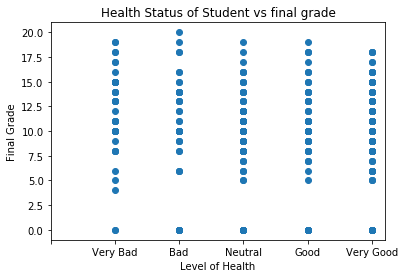

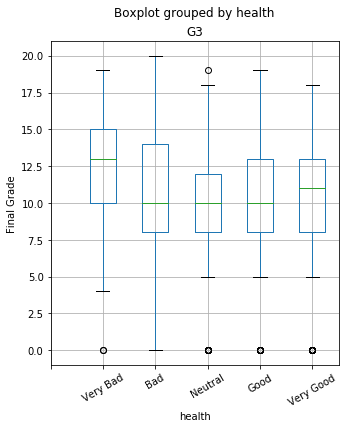

In [81]:
plt.scatter(student_mat_df.health, student_mat_df.G3)
plt.title("Health Status of Student vs final grade")
plt.xlabel("Level of Health")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.show()

student_mat_df.boxplot('G3','health',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("health")
plt.ylabel('Final Grade')
plt.show()

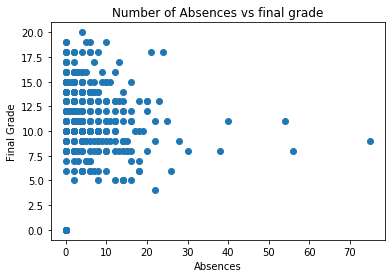

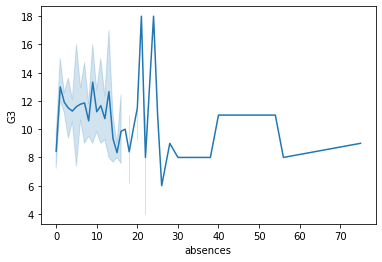

In [86]:
plt.scatter(student_mat_df.absences, student_mat_df.G3)
plt.title("Number of Absences vs final grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()

ax = sns.lineplot(x=student_mat_df.absences, y=student_mat_df.G3, )

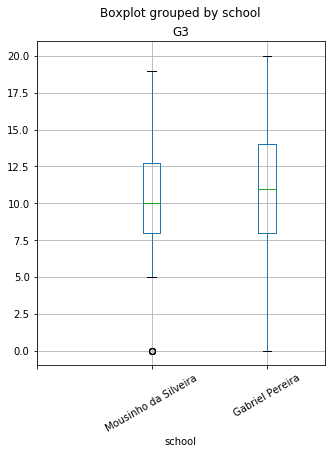

In [31]:
student_mat_df.boxplot('G3','school',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'Mousinho da Silveira', 'Gabriel Pereira'))

plt.show()

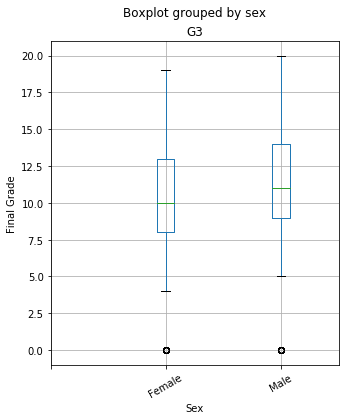

In [32]:
student_mat_df.boxplot('G3','sex',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'Female', 'Male'))
plt.xlabel("Sex")
plt.ylabel('Final Grade')

plt.show()

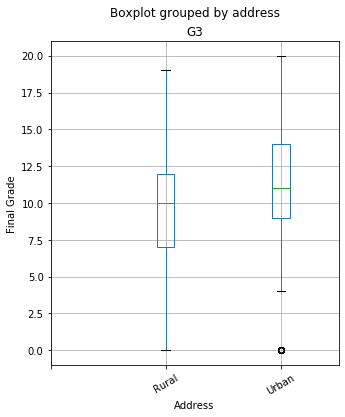

In [33]:
student_mat_df.boxplot('G3','address',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'Rural', 'Urban'))
plt.xlabel("Address")
plt.ylabel('Final Grade')
plt.show()

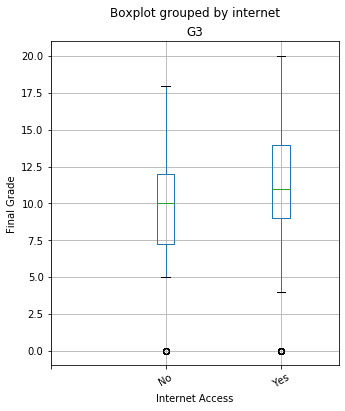

In [34]:
student_mat_df.boxplot('G3','internet',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Internet Access")
plt.ylabel('Final Grade')
plt.show()

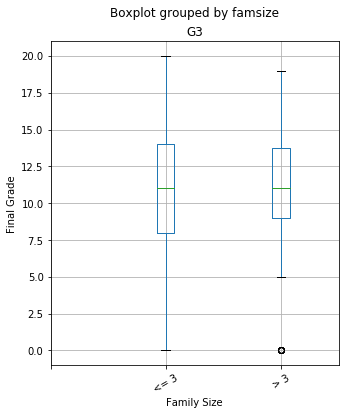

In [35]:
student_mat_df.boxplot('G3','famsize',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', '<= 3', '> 3'))
plt.xlabel("Family Size")
plt.ylabel('Final Grade')
plt.show()

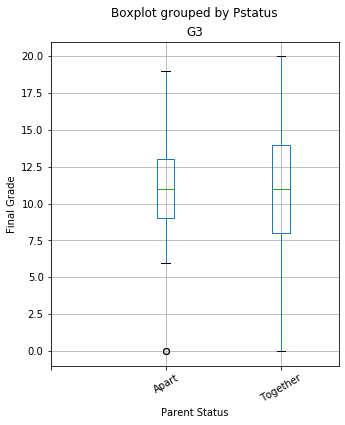

In [36]:
student_mat_df.boxplot('G3','Pstatus',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'Apart', 'Together'))
plt.xlabel("Parent Status")
plt.ylabel('Final Grade')
plt.show()

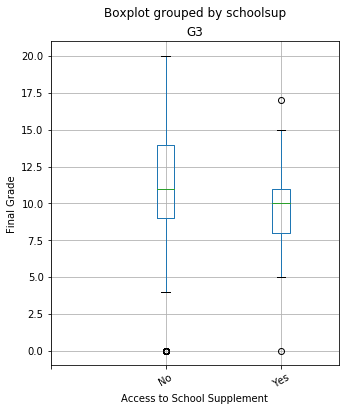

In [37]:
student_mat_df.boxplot('G3','schoolsup',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to School Supplement")
plt.ylabel('Final Grade')
plt.show()

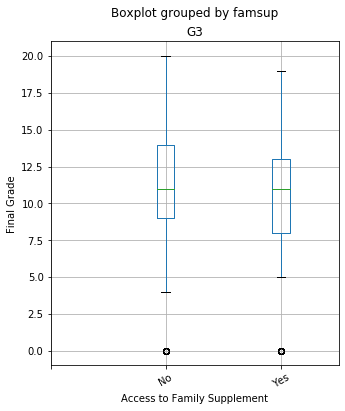

In [38]:
student_mat_df.boxplot('G3','famsup',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to Family Supplement")
plt.ylabel('Final Grade')
plt.show()

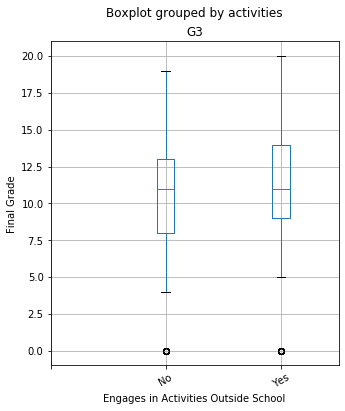

In [39]:
student_mat_df.boxplot('G3','activities',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Engages in Activities Outside School")
plt.ylabel('Final Grade')
plt.show()

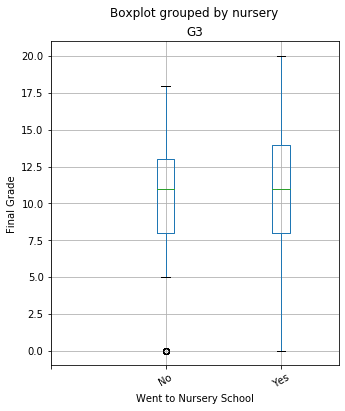

In [40]:
student_mat_df.boxplot('G3','nursery',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Went to Nursery School")
plt.ylabel('Final Grade')
plt.show()

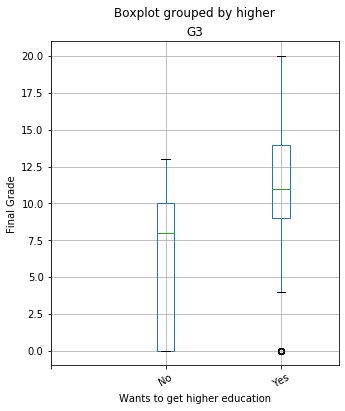

In [41]:
student_mat_df.boxplot('G3','higher',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Wants to get higher education")
plt.ylabel('Final Grade')
plt.show()

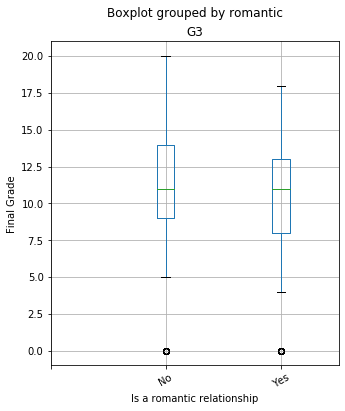

In [42]:
student_mat_df.boxplot('G3','romantic',rot = 30,figsize=(5,6))
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Is a romantic relationship")
plt.ylabel('Final Grade')
plt.show()

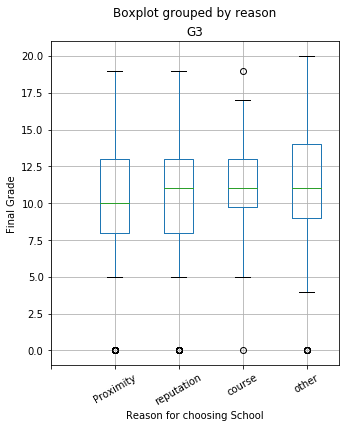

In [43]:
student_mat_df.boxplot('G3','reason',rot = 30,figsize=(5,6))
plt.xticks(np.arange(5), ('', "Proximity", "reputation", "course", "other"))
plt.xlabel("Reason for choosing School")
plt.ylabel('Final Grade')
plt.show()

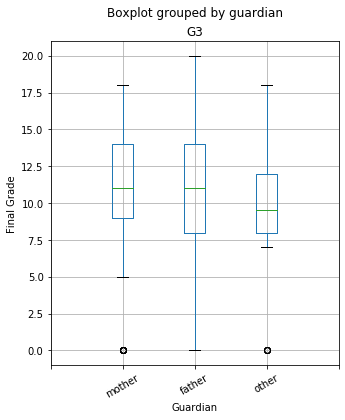

In [44]:
student_mat_df.boxplot('G3','guardian',rot = 30,figsize=(5,6))
plt.xticks(np.arange(5), ('', "mother", "father", "other"))
plt.xlabel("Guardian")
plt.ylabel('Final Grade')
plt.show()

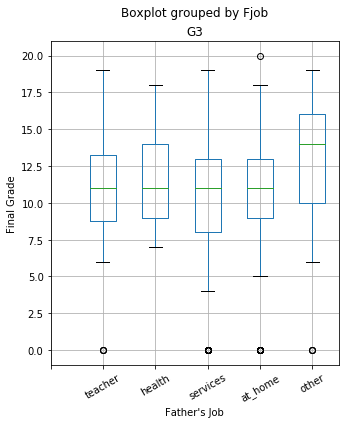

In [45]:
student_mat_df.boxplot('G3','Fjob',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Father's Job")
plt.ylabel('Final Grade')
plt.show()

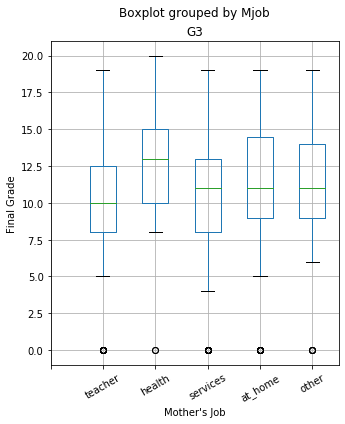

In [46]:
student_mat_df.boxplot('G3','Mjob',rot = 30,figsize=(5,6))
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Mother's Job")
plt.ylabel('Final Grade')
plt.show()

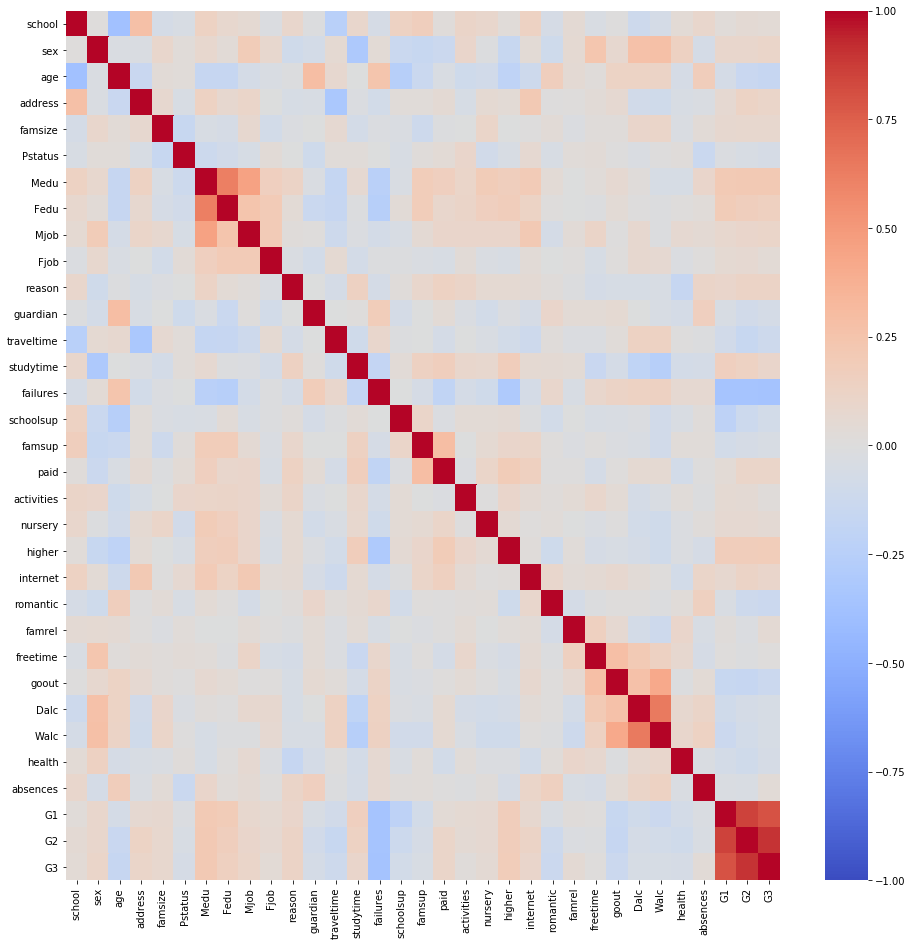

In [47]:
# Correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(student_mat_df.corr(), fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

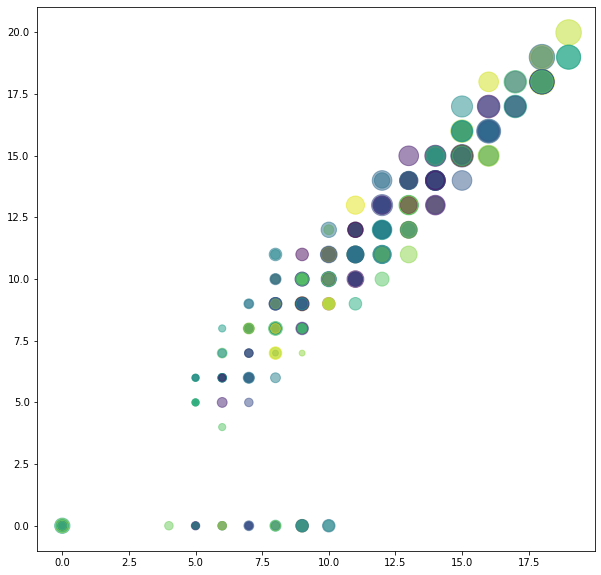

In [88]:
N = 395
colors = np.random.rand(N)
plt.figure(figsize=(10,10))
plt.scatter(student_mat_df.G2, student_mat_df.G3, s=student_mat_df.G1 **2.2, c=colors, alpha=0.5)
plt.show()

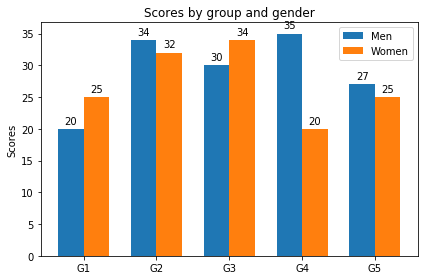

In [49]:

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [50]:
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,1,5,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,0,1,1,1,1,3,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,1,1,1,3,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,0,1,4,2,2,4,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,0,1,3,3,3,3,...,4,3,2,1,2,5,4,6,10,10


## Correlation Analysis

In [51]:
#values = [2,6,7,12,14,13,23,24,25,26,27,28,29,30,31, 1,3,4,5,15,16,17,18,19,20,21,22]

from numpy import cov
for value in range(31):
    # calculate the covariance between two variables

    # calculate covariance matrix
    covariance = cov(student_mat_df.iloc[:, value], student_mat_df.G3)
    print(covariance)

[[ 0.10315492  0.06624044]
 [ 0.06624044 20.9896164 ]]
[[ 0.24992611  0.23695303]
 [ 0.23695303 20.9896164 ]]
[[ 1.62828504 -0.94461222]
 [-0.94461222 20.9896164 ]]
[[ 0.17359121  0.20186982]
 [ 0.20186982 20.9896164 ]]
[[ 0.20583435  0.16920902]
 [ 0.16920902 20.9896164 ]]
[[ 0.09325965 -0.08116044]
 [-0.08116044 20.9896164 ]]
[[ 1.19844503  1.08909593]
 [ 1.08909593 20.9896164 ]]
[[ 1.18418043  0.76007839]
 [ 0.76007839 20.9896164 ]]
[[ 1.50668894  0.5740667 ]
 [ 0.5740667  20.9896164 ]]
[[ 0.74570456  0.16729422]
 [ 0.16729422 20.9896164 ]]
[[ 1.45983422  0.67529397]
 [ 0.67529397 20.9896164 ]]
[[ 0.2880293  -0.17238322]
 [-0.17238322 20.9896164 ]]
[[ 0.48651288 -0.37433657]
 [-0.37433657 20.9896164 ]]
[[ 0.70432436  0.37611   ]
 [ 0.37611    20.9896164 ]]
[[ 0.55301677 -1.22793163]
 [-1.22793163 20.9896164 ]]
[[ 0.11272891 -0.12734691]
 [-0.12734691 20.9896164 ]]
[[ 0.23791043 -0.08750241]
 [-0.08750241 20.9896164 ]]
[[ 0.24888518  0.23312343]
 [ 0.23312343 20.9896164 ]]
[[ 0.25055

In [52]:
from scipy.stats import pearsonr
pearson = []
for value in range(33):
    corr, _ = pearsonr(student_mat_df.iloc[:, value], student_mat_df.G3)
    pearson.append(round(corr, 3))
for value in range(31):
    print(pearson[value])

0.045
0.103
-0.162
0.106
0.081
-0.058
0.217
0.152
0.102
0.042
0.122
-0.07
-0.117
0.098
-0.36
-0.083
-0.039
0.102
0.016
0.052
0.182
0.098
-0.13
0.051
0.011
-0.133
-0.055
-0.052
-0.061
0.034
0.801


In [53]:
from scipy.stats import spearmanr
spearman = []
for value in range(31):
    corrS, _ = spearmanr(student_mat_df.iloc[:, value], student_mat_df.G3)
    spearman.append(round(corrS, 3))
    print('Spearmans correlation: %.3f' % corrS)

Spearmans correlation: 0.065
Spearmans correlation: 0.103
Spearmans correlation: -0.173
Spearmans correlation: 0.119
Spearmans correlation: 0.066
Spearmans correlation: -0.044
Spearmans correlation: 0.225
Spearmans correlation: 0.170
Spearmans correlation: 0.090
Spearmans correlation: 0.048
Spearmans correlation: 0.109
Spearmans correlation: -0.075
Spearmans correlation: -0.121
Spearmans correlation: 0.105
Spearmans correlation: -0.361
Spearmans correlation: -0.151
Spearmans correlation: -0.050
Spearmans correlation: 0.061
Spearmans correlation: 0.026
Spearmans correlation: 0.032
Spearmans correlation: 0.172
Spearmans correlation: 0.108
Spearmans correlation: -0.091
Spearmans correlation: 0.055
Spearmans correlation: -0.005
Spearmans correlation: -0.166
Spearmans correlation: -0.121
Spearmans correlation: -0.104
Spearmans correlation: -0.048
Spearmans correlation: 0.018
Spearmans correlation: 0.878


In [54]:
cats = ['Medu', 'Fedu', 'traveltime', 
          'studytime', 'failures', 'famrel', 
          'goout', 'Dalc', 'Walc','health']
numeric = ["age", "absences", "G1", "G2", "G3"]
nominal = ['Fjob', 'Mjob', 'reason', 'guardian']

student_mat_df[numeric].shape

(395, 5)

In [55]:
names = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']
print(names)
type(names)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


list

In [56]:
# Defining the data type as categorical for the categorical variables
student_mat_df.iloc[:, 0:31] =(student_mat_df.iloc[:, 0:31]).astype('category')
# Defining the interger data types
student_mat_df[["age", "absences", "G1", "G2", "G3"]] = student_mat_df[["age", "absences", "G1", "G2", "G3"]].astype('int')
# confirm results
student_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int32   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    category
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

### Scaling the data

In [57]:
# We first divide our data into attributes and labels:

X = student_mat_df[names].values # Independent/predictor variables
y = student_mat_df['G3'].values    # Dependent/label variable

In [58]:
# Since we approached this as a classification problem, 
# the label Variable 'G3' has too many classes (21) for each value from 0 to 21
# this makes it difficult to classify given the number of instances is only 395
# the provided solution reduces the classes father by mapping values to only 4 classes

from numpy import interp

y = student_mat_df['G3']
y = interp(y,[0, 20],[1, 4]).round(0)  # since the resulting variables are float,
y.astype(int) # we change them to int variables to rep categories

array([2, 2, 2, 3, 2, 3, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3,
       2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 4, 2, 2, 3, 2, 3, 2, 3, 2, 2, 4, 3, 2, 4, 3, 2, 4, 3, 3,
       4, 2, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 4, 1, 1,
       3, 3, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 1, 2, 1, 3, 2, 1,
       3, 2, 3, 2, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2,
       3, 2, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2,
       4, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 1, 4, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3,
       1, 3, 1, 4, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 4, 2, 3, 2,
       1, 4, 2, 3, 2, 1, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 2, 3, 3, 3,

In [59]:
# scaling using the standard scaler function from sci-kit learn 
from sklearn.preprocessing import StandardScaler
sklearn.preprocessing.StandardScaler(X)

StandardScaler(copy=array([[1, 0, 18, ..., 6, 5, 6],
       [1, 0, 17, ..., 4, 5, 5],
       [1, 0, 15, ..., 10, 7, 8],
       ...,
       [0, 1, 21, ..., 3, 10, 8],
       [0, 1, 18, ..., 0, 11, 12],
       [0, 1, 19, ..., 5, 8, 9]], dtype=object),
               with_mean=True, with_std=True)

### Feature selection/ Dimension reduction

Not all the provided features may have a significant effect 
on the target variable.while exploration and visualizations 
help in giving insights on the correlation,some connections
may not be directly perceived. As such, including variables 
that have minimal effect on the target variable or ommiting 
variables that have significant effect during modelling affects
the performance of the models. 

Boruta, a dimensio reduction feature, automates the process
by checking for multicollinearityand reduces the number of 
features to only the most significant hence boosting model performance.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)


In [61]:
# splitting the data into a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size = 0.25, random_state = 0)

### Modelling

In [62]:
# import the classifier models
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn import svm                             # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier

# Create instancess of the classifiers
logistic_classifier = LogisticRegression(random_state = 0, solver='newton-cg', 
                                         max_iter= 1000, fit_intercept = True, 
                                         multi_class='multinomial', n_jobs = 10)
decision_classifier = DecisionTreeClassifier()
svm_svc_classifier = svm.SVC(decision_function_shape='ovo')
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_classifier = GaussianNB()#.fit(X_train, y_train)
random_classifier = RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=0, n_jobs=10)

# Fit the instances with the training set
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_svc_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)
random_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting the target variable using the classifier instances created

In [63]:
logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_svc_y_prediction = svm_svc_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test) 
random_y_prediction = random_classifier.predict(X_test)

### Rate the accuracy of the models using %

In [64]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(logistic_y_prediction, y_test))
print(accuracy_score(decision_y_prediction, y_test))
print(accuracy_score(svm_svc_y_prediction, y_test))
#print(accuracy_score(svm_y_prediction, y_test))
#print(accuracy_score(svm_regr_y_pred, y_test))
#print(accuracy_score(svm_lin_clf_y_pred, y_test))

print(accuracy_score(knn_y_prediction, y_test))
print(accuracy_score(naive_y_prediction, y_test))
print(accuracy_score(random_y_prediction, y_test)) 

0.8686868686868687
0.8585858585858586
0.8181818181818182
0.8484848484848485
0.8282828282828283
0.8787878787878788


In [65]:
student_por_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv"
student_por_df = pd.read_csv(student_por_url, ';')
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [66]:
student_por_df.isnull().sum().sum()

0